# 1. Understanding the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)

In [2]:
df = pd.read_csv('Data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
len(df)

294478

In [4]:
df['user_id'].nunique()

290584

In [5]:
len(df[df['converted'] == 1]['user_id'].unique())/len(df['user_id'].unique())

0.12104245244060237

In [6]:
len(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')])+len(df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')])

3893

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


# 2. Messy Data

In [8]:
df2 = df.copy()

In [9]:
indexNames = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index
indexNames1 = df[(df['group'] != 'treatment') & (df['landing_page'] == 'new_page')].index

In [10]:
df2.drop(indexNames, inplace=True)
df2.drop(indexNames1, inplace=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

# 3. Updated DataFrame

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [13]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
df2.drop(2893, inplace=True)

In [16]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


# 4. Probability

In [17]:
len(df2[df2['converted'] == 1])/len(df2)

0.11959708724499628

In [18]:
len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'control'])

0.1203863045004612

In [19]:
#Difference between control group and treatment group
len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'control'])-len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'treatment'])

0.0015782389853555567

In [20]:
len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)])/len(df2[df2['group'] == 'treatment'])

0.11880806551510564

In [21]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

Probability of any individual getting either the new_page or the old_page is very close to half. The probability of of an individual converting in either group is 0.1196, and the probabability of a user on the new_page converting is 0.1188 which is actually lower than the mean conversion rate for either group. Therefore, we do not have enough evidence to suggest that one group is better than the other.

# 5. Hypothesis Testing


$$H_0$$ = **$p_{old}$** ≥ **$p_{new}$**

$$H_1$$ = **$p_{old}$** < **$p_{new}$**

In [22]:
p_new = len(df2[df2['converted'] == 1])/len(df2)
p_new

0.11959708724499628

In [23]:
p_old = len(df2[df2['converted'] == 1])/len(df2)
p_old

0.11959708724499628

In [24]:
n_new = len(df2[df2['group'] == 'treatment'])
n_new

145310

In [25]:
n_old = len(df2[df2['group'] == 'control'])
n_old

145274

In [26]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
new_page_converted.mean()

0.11991604156630652

In [27]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
old_page_converted.mean()

0.11927117034018475

In [28]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.0006448712261217654

In [29]:
p_diffs = []

for i in range(10000):
    new_page_converted_BS = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted_BS = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    meanDiff = new_page_converted_BS.mean() - old_page_converted_BS.mean()
    p_diffs.append(meanDiff)

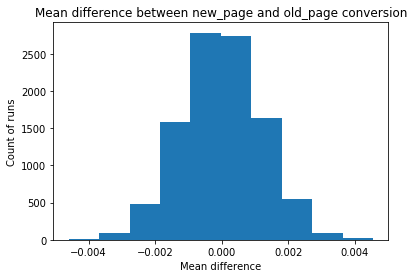

In [30]:
plt.hist(p_diffs)
plt.title('Mean difference between new_page and old_page conversion')
plt.xlabel('Mean difference')
plt.ylabel('Count of runs');

In [31]:
p_diffs = np.array(p_diffs)

In [32]:
p_diffs

array([-0.0014336 , -0.00041498, -0.00036008, ..., -0.00092418,
       -0.00206005, -0.00081418])

In [33]:
dataDiff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()

dataDiff

-0.0015782389853555567

In [34]:
(p_diffs > dataDiff).mean()

0.9104

This value is called the p-value. The p-value is the probability of us obtaining these results, given that the null hypothesis is correct. With a p-value of 0.91 (91%), this means that there is a very high likelihood of us getting these results if the null hypothesis is correct, therefore these results are not statistically significant and we can not conclude that the new page has a better conversion rate, and therefore we fail to reject the null hypothesis.

In [35]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page']['converted'].sum()
convert_new = df2[df2['landing_page'] == 'new_page']['converted'].sum()
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_new = len(df2[df2['landing_page'] == 'new_page'])

In [36]:
stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [37]:
stat, pval

(1.3109241984234394, 0.9050583127590245)

The result for p-value agree with the findings I found in parts j and k, as the p-value is very similar at roughly 0.91, which means we fail to reject the null hypothesis.

# Part III - A regression approach

We need to use logistic regression

In [38]:
df2['intercept'] = 1

In [39]:
dummy = pd.get_dummies(df2['group'])

In [40]:
df2 = pd.concat([df2, dummy], axis=1)

In [41]:
df2.drop('control', axis=1, inplace=True)

In [42]:
df2.rename(columns = {'treatment':'ab_page'}, inplace = True) 

In [43]:
LogReg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

In [44]:
results = LogReg.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:16:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

P-value for ab_page is 0.19, which is much lower than the p-value found in the previous part which was around 0.91. The reason for this change is because in this scenario, the null hypothesis is checking if **$p_{old}$** is equal to **$p_{new}$**, whereas in the previous scenario, the null hypothesis was checking if **$p_{old}$** was the same or greater than **$p_{new}$**

Adding other factors into the regression model allows for us to take into account the different factors which may have an effect on whether a user converts or not, allowing for a more sophisticated model. However, adding unnecessary factors can have an adverse effect, as it can introduce multicollinearity, which is when factors are correlated with each other. This can lead to reduced accuracy of the model.

In [45]:
countriesDF = pd.read_csv('Data/countries.csv')
countriesDF.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
df3 = countriesDF.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [47]:
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
dummyCountry = pd.get_dummies(df3['country'])

In [49]:
df3 = pd.concat([df3, dummyCountry], axis=1)

In [50]:
df3.drop('US', axis=1, inplace=True)

In [51]:
LogRegCountry = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])

In [52]:
resultsCountry = LogRegCountry.fit()
resultsCountry.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        21:16:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

The p-value for Canada and UK is above 0.05, therefore there is no statistical evidence that country has got any statistical significance on determining the conversion rate.

In [53]:
LogRegCombined = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
resultsCombined = LogRegCombined.fit()
resultsCombined.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:               2.323e-05
Time:                        21:16:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

After adding the ab_page column, we still could not find any statistical siginificance as the p-values remained above 0.05.

In conclusion, we failed to reject the null hypothesis, and therefore, the company should not switch over to the new web page, and should remain on the old page. In fact, as was found in line 19, under section 4. Probability, the control group actually performed ever so slightly better in terms of conversion, with .157% better conversion than the treatment group. This means that the company should stick with their old page as not only does it perform better, but it will also reduce the costs of having to roll out the new page.